<a href="https://colab.research.google.com/github/siddharthbaleja7/Analytics/blob/main/NeoSapien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!gdown https://docs.google.com/spreadsheets/d/1iUd_HFOKm287Vd0VXyVsTNQRCkBzWBrh3co_uthaRNA/edit?gid=386998417#gid=386998417

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1iUd_HFOKm287Vd0VXyVsTNQRCkBzWBrh3co_uthaRNA
  warnings.warn(
Downloading...
From: https://docs.google.com/spreadsheets/d/1iUd_HFOKm287Vd0VXyVsTNQRCkBzWBrh3co_uthaRNA/edit?gid=386998417#gid=386998417
To: /content/edit?gid=386998417#gid=386998417
204kB [00:00, 1.73MB/s]


In [ ]:
df  = pd.read_csv("/content/app_logs - app_logs.csv")

In [ ]:
df

,timestamp,endpoint,user_id,response_time_ms,status_code
0,2024-12-01 23:20:31,/api/search,user_25,98,200
1,2024-12-01 23:25:31,/api/recommendations,user_82,107,200
2,2024-12-01 23:30:31,/api/chat,user_89,147,200
3,2024-12-01 23:35:31,/api/search,user_12,96,200
4,2024-12-01 23:40:31,/api/search,user_15,98,200
...,...,...,...,...,...
2011,2024-12-08 22:55:31,/api/chat,user_8,138,200
2012,2024-12-08 23:00:31,/api/user/profile,user_83,106,200
2013,2024-12-08 23:05:31,/api/recommendations,user_65,101,200
2014,2024-12-08 23:10:31,/api/user/profile,user_57,89,200


In [ ]:
metrics = {}
group = df.groupby('endpoint')
metrics['avg_response_time'] = group['response_time_ms'].mean()
metrics['p95_response_time'] = group['response_time_ms'].quantile(0.95)


In [ ]:
metrics

{'avg_response_time': endpoint
 /api/chat               445.026515
 /api/recommendations    348.311871
 /api/search             471.608081
 /api/user/profile       410.600806
 Name: response_time_ms, dtype: float64,
 'p95_response_time': endpoint
 /api/chat               235.65
 /api/recommendations    155.20
 /api/search             157.90
 /api/user/profile       160.00
 Name: response_time_ms, dtype: float64}

In [ ]:
error_data = df[df['status_code'] >= 400]
metrics['error'] = error_data.groupby('status_code').size() / len(df)

In [ ]:
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour
metrics['peak_usage'] = df.groupby('hour').size()

In [ ]:
metrics

{'avg_response_time': endpoint
 /api/chat               445.026515
 /api/recommendations    348.311871
 /api/search             471.608081
 /api/user/profile       410.600806
 Name: response_time_ms, dtype: float64,
 'p95_response_time': endpoint
 /api/chat               235.65
 /api/recommendations    155.20
 /api/search             157.90
 /api/user/profile       160.00
 Name: response_time_ms, dtype: float64,
 'error': status_code
 400    0.024802
 500    0.025794
 504    0.009921
 dtype: float64,
 'peak_usage': hour
 0     84
 1     84
 2     84
 3     84
 4     84
 5     84
 6     84
 7     84
 8     84
 9     84
 10    84
 11    84
 12    84
 13    84
 14    84
 15    84
 16    84
 17    84
 18    84
 19    84
 20    84
 21    84
 22    84
 23    84
 dtype: int64}

In [ ]:
metrics['slow_requests_percent'] = (df['response_time_ms'] > 1000).sum() / len(df) * 100

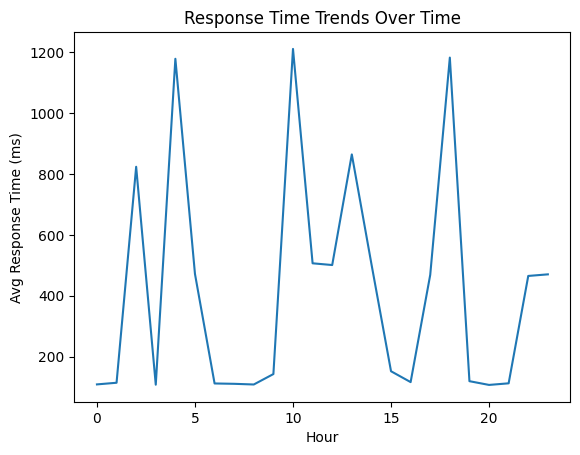

In [ ]:
 # Response time trends over time
df['timestamp'] = pd.to_datetime(df['timestamp'])
response_time_trends = df.groupby(df['timestamp'].dt.hour)['response_time_ms'].mean()
response_time_trends.plot(title="Response Time Trends Over Time", ylabel="Avg Response Time (ms)", xlabel="Hour")
plt.show()

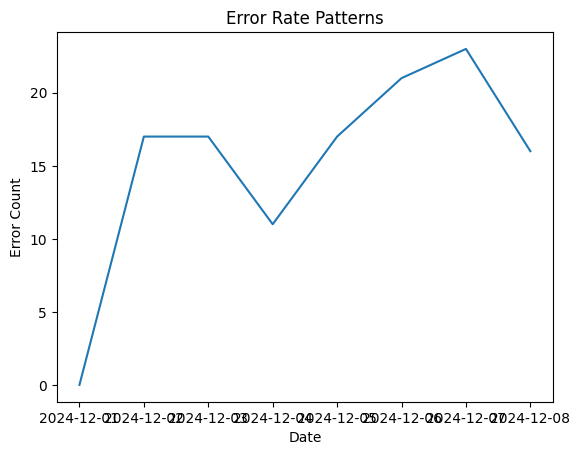

In [ ]:
 # Error rate patterns
error_rate_pattern = df.groupby(df['timestamp'].dt.date)['status_code'].apply(lambda x: (x >= 400).sum())
error_rate_pattern.plot(title="Error Rate Patterns", ylabel="Error Count", xlabel="Date")
plt.show()

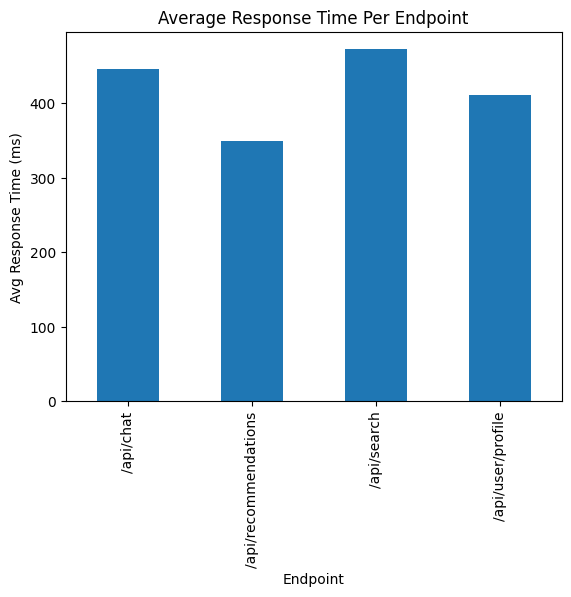

In [ ]:
 # Average response time per endpoint
metrics['avg_response_time'].plot(kind='bar', title="Average Response Time Per Endpoint", ylabel="Avg Response Time (ms)", xlabel="Endpoint")
plt.show()


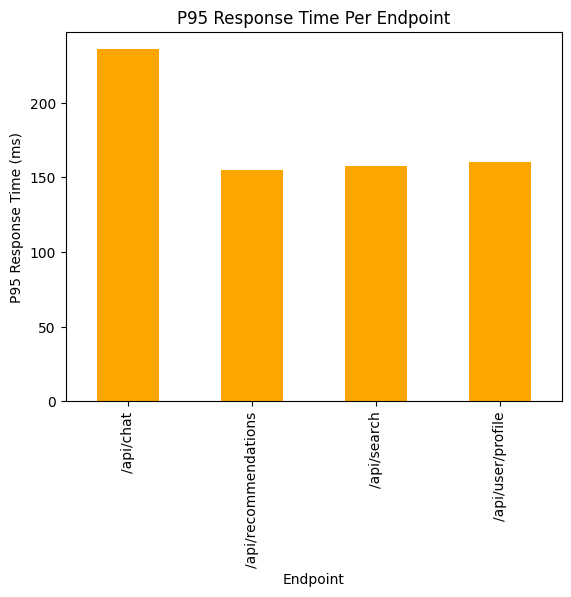

In [ ]:
 # P95 response time per endpoint
metrics['p95_response_time'].plot(kind='bar', title="P95 Response Time Per Endpoint", color='orange', ylabel="P95 Response Time (ms)", xlabel="Endpoint")
plt.show()

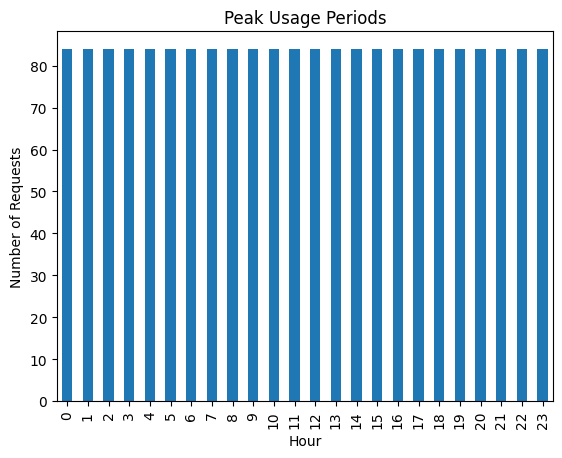

In [ ]:
  # Peak usage periods
metrics['peak_usage'].plot(kind='bar', title="Peak Usage Periods", ylabel="Number of Requests", xlabel="Hour")
plt.show()

In [ ]:
# Anomaly Detection
anomalies = {}


In [ ]:
# Unusual spikes in response time
response_time_std = df['response_time_ms'].std()
anomalies['response_time_spikes'] = df[df['response_time_ms'] > df['response_time_ms'].mean() + 3 * response_time_std]


In [ ]:
 # Error rate anomalies
error_rate_by_hour = df.groupby(df['hour'])['status_code'].apply(lambda x: (x >= 400).sum() / len(x))
anomalies['error_rate_spikes'] = error_rate_by_hour[error_rate_by_hour > error_rate_by_hour.mean() + 3 * error_rate_by_hour.std()]

In [ ]:
print(metrics)

{'avg_response_time': endpoint
/api/chat               445.026515
/api/recommendations    348.311871
/api/search             471.608081
/api/user/profile       410.600806
Name: response_time_ms, dtype: float64, 'p95_response_time': endpoint
/api/chat               235.65
/api/recommendations    155.20
/api/search             157.90
/api/user/profile       160.00
Name: response_time_ms, dtype: float64, 'error': status_code
400    0.024802
500    0.025794
504    0.009921
dtype: float64, 'peak_usage': hour
0     84
1     84
2     84
3     84
4     84
5     84
6     84
7     84
8     84
9     84
10    84
11    84
12    84
13    84
14    84
15    84
16    84
17    84
18    84
19    84
20    84
21    84
22    84
23    84
dtype: int64, 'slow_requests_percent': 0.992063492063492}


In [ ]:
print(anomalies)

{'response_time_spikes':                timestamp              endpoint  user_id  response_time_ms  \
33   2024-12-02 02:05:31     /api/user/profile  user_18             30000   
139  2024-12-02 10:55:31             /api/chat   user_6             30000   
142  2024-12-02 11:10:31  /api/recommendations  user_54             30000   
184  2024-12-02 14:40:31             /api/chat  user_88             30000   
219  2024-12-02 17:35:31           /api/search  user_40             30000   
360  2024-12-03 05:20:31  /api/recommendations  user_38             30000   
514  2024-12-03 18:10:31     /api/user/profile  user_53             30000   
744  2024-12-04 13:20:31           /api/search  user_82             30000   
863  2024-12-04 23:15:31     /api/user/profile  user_13             30000   
925  2024-12-05 04:25:31           /api/search  user_18             30000   
926  2024-12-05 04:30:31             /api/chat  user_67             30000   
1022 2024-12-05 12:30:31     /api/user/profile  use